In [1]:
from utils.analysis.tools import simDir, springPhaseDiagram
from pathlib import Path
from utils.file_operations import input_parse
from tqdm import tqdm
import multiprocessing as mp 
from pathlib import Path
from utils import plot
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/")

In [2]:
no_condensate = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240118_RNAOnly/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_6_M3_1.0_kt_0.0_rl_9.0_wd_0.0")
no_condensate.run()
no_condensate.rna()
no_condensate_rna = no_condensate.rna_amount[-1][0]

Using default movie parameters.


In [4]:
spd = springPhaseDiagram(root/"20240118_PhaseDiagramSpringVsRestLengthCondensateFixedHighRes")
# spd.extract_data(299)
# spd.df.to_pickle("20240118_PhaseDiagramSpringVsRestLengthCondensateFixedHighRes.pkl")


In [5]:
spd.df = pd.read_pickle("20240118_PhaseDiagramSpringVsRestLengthCondensateFixedHighRes.pkl")


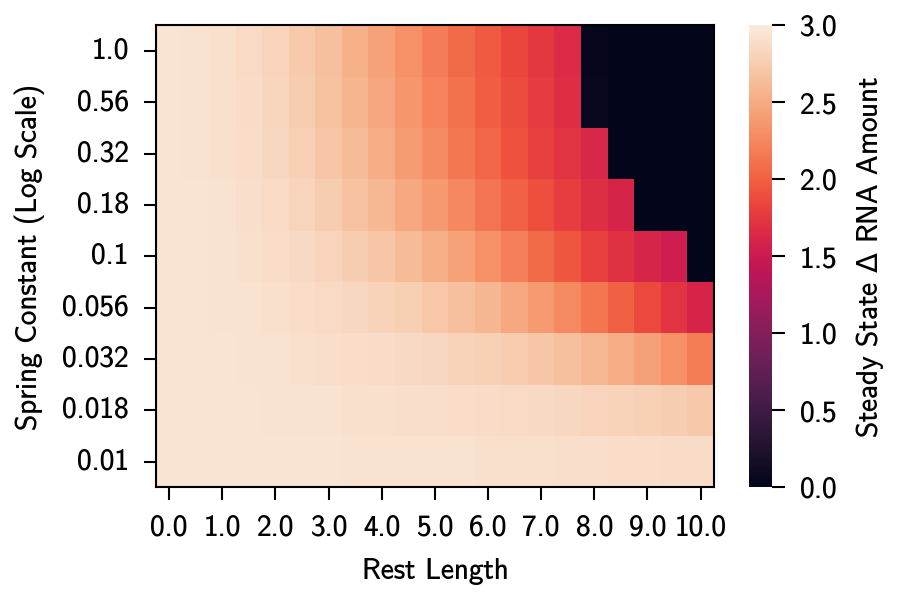

In [6]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = spd.df.pivot(index="k_tilde",columns="rest_length",values=variable)
g = sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

In [7]:
def generate_linlog_sequence(min_value, max_value):
    if min_value <= 0 or max_value <= 0:
        raise ValueError("min_value and max_value must be positive")

    sequence = []

    # Start from the smallest power of 10 less than or equal to min_value
    min_power = int(np.floor(np.log10(min_value)))
    max_power = int(np.ceil(np.log10(max_value)))

    for power in range(min_power, max_power + 1):
        # For each power of 10, generate linear sequence
        start = max(10 ** power, min_value)
        end = min(10 ** (power + 1) - 1, max_value)
        sequence.extend(np.arange(start, end + 1, 10 ** power))

    return np.array(sequence)

[Text(0, 0.5, '$10^{-2}$'),
 Text(0, 4.5, '$10^{-1}$'),
 Text(0, 8.5, '$10^{0}$')]

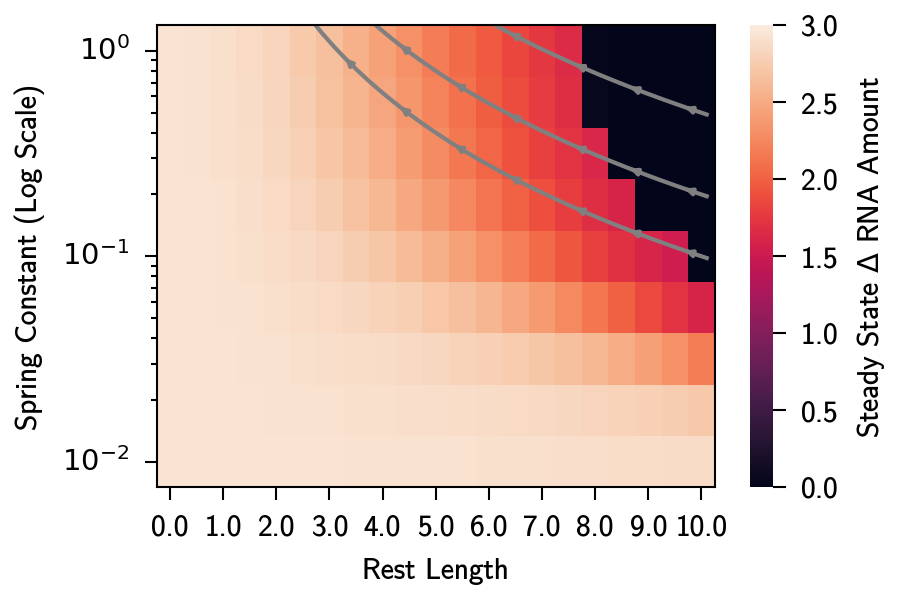

In [8]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = spd.df.pivot(index="k_tilde",columns="rest_length",values=variable)
g = sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)
    
    
for c in [10, 20, 50]:
    line_x = np.linspace(0,10.1)
    line_y = c/line_x**2

    x_min, x_max = pivot.columns.min(), pivot.columns.max()
    mapped_x = (line_x - x_min) / (x_max - x_min) * (len(pivot.columns) - 1)+0.5

    # Map y coordinates (logarithmic scale)
    y_min, y_max = np.log(pivot.index.min()), np.log(pivot.index.max())
    mapped_y = (np.log(line_y) - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

    line, = ax.plot(mapped_x,mapped_y,color="grey")
    plot.add_arrow(line,direction='left')

def map_y(y):
    return (np.log(y) - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

ax.yaxis.set_minor_locator(ticker.FixedLocator(map_y(generate_linlog_sequence(0.01,1))))
ax.set_yticks(map_y(np.array([0.01,0.1,1])))
ax.set_yticklabels([f"$10^{{{i}}}$" for i in [-2,-1,0]])


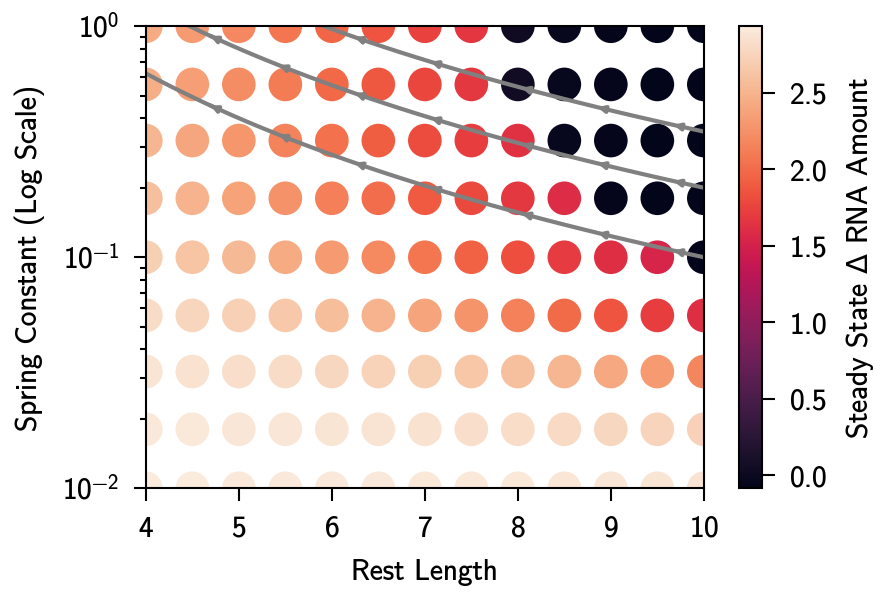

In [10]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
im = ax.scatter(x=df["rest_length"],
            y=df["k_tilde"],
            c=df["rna_amount"]-no_condensate_rna,
            cmap="rocket",
            s=50)
fig.colorbar(im, ax=ax, label=cbarlabel)
ax.set_yscale("log")
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim([4,10])
ax.set_ylim([0.01,1])
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

for c in [10,20,35]:
    x = np.linspace(2,10)
    line, = ax.plot(x,c/x**2,color="grey")
    plot.add_arrow(line,direction='left')

In [39]:
df["displacement"] = (df["condensate_com"] - df["rest_length"]).astype(np.float64)

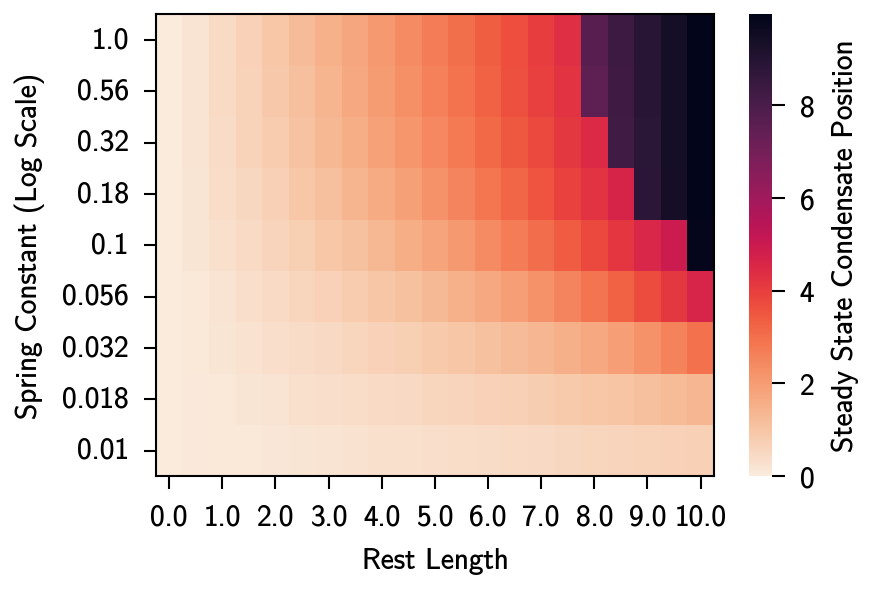

In [44]:
variable="condensate_com"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel="Steady State Condensate Position"

fig, ax = plt.subplots()
pivot = df.pivot(index="k_tilde",columns="rest_length",values=variable)
sns.heatmap(pivot, ax = ax,
            cbar_kws={'label': cbarlabel},
            cmap="rocket_r")
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

In [4]:
spd = springPhaseDiagram(root/"20240122_PhaseDiagramFixedAccurateMobility")
spd.extract_data(299)
spd.df.to_pickle("20240122_PhaseDiagramFixedAccurateMobility.pkl")


Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.






Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using de

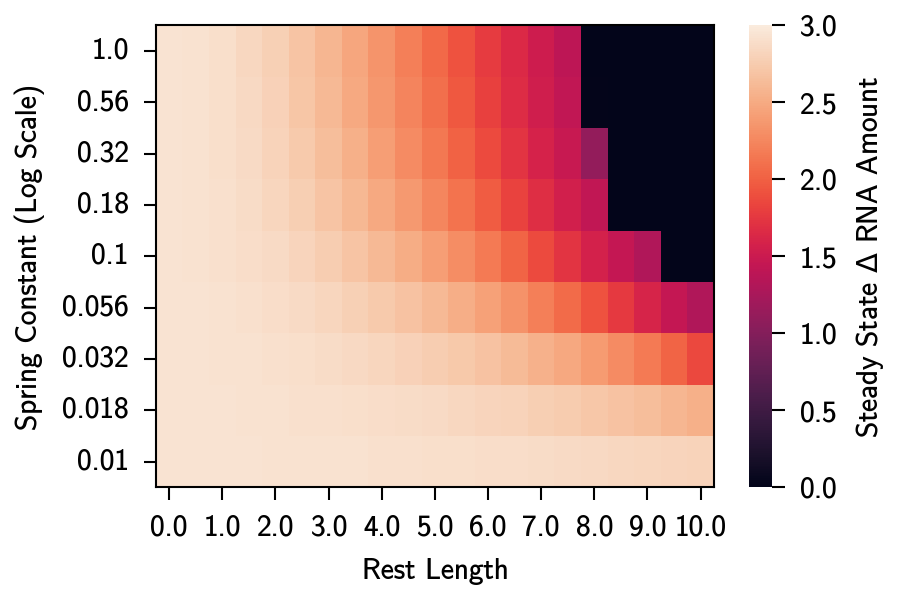

In [7]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = spd.df.pivot(index="k_tilde",columns="rest_length",values=variable)
sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

[Text(0, 0.5, '$10^{-2}$'),
 Text(0, 4.5, '$10^{-1}$'),
 Text(0, 8.5, '$10^{0}$')]

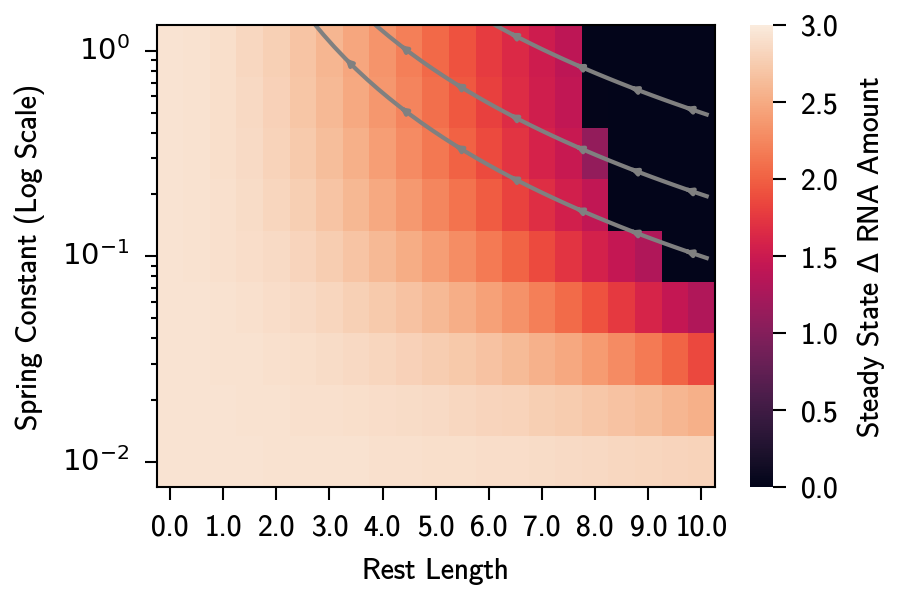

In [10]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = spd.df.pivot(index="k_tilde",columns="rest_length",values=variable)
g = sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)
    
    
for c in [10, 20, 50]:
    line_x = np.linspace(0,10.1)
    line_y = c/line_x**2

    x_min, x_max = pivot.columns.min(), pivot.columns.max()
    mapped_x = (line_x - x_min) / (x_max - x_min) * (len(pivot.columns) - 1)+0.5

    # Map y coordinates (logarithmic scale)
    y_min, y_max = np.log(pivot.index.min()), np.log(pivot.index.max())
    mapped_y = (np.log(line_y) - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

    line, = ax.plot(mapped_x,mapped_y,color="grey")
    plot.add_arrow(line,direction='left')

def map_y(y):
    return (np.log(y) - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

ax.yaxis.set_minor_locator(ticker.FixedLocator(map_y(generate_linlog_sequence(0.01,1))))
ax.set_yticks(map_y(np.array([0.01,0.1,1])))
ax.set_yticklabels([f"$10^{{{i}}}$" for i in [-2,-1,0]])


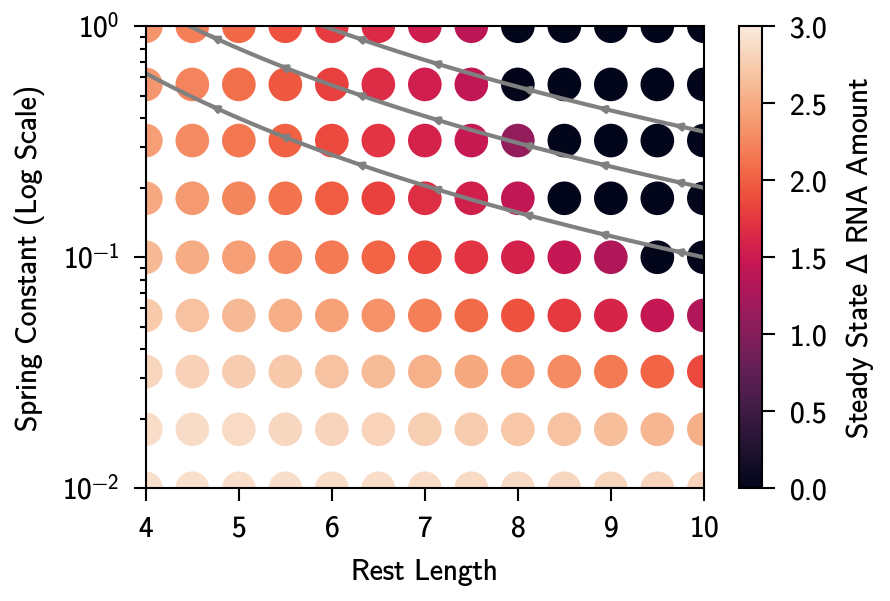

In [11]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
im = ax.scatter(x=df["rest_length"],
            y=df["k_tilde"],
            c=df["rna_amount"]-no_condensate_rna,
            cmap="rocket",
            s=50,
            vmin=0,
            vmax=3)
fig.colorbar(im, ax=ax, label=cbarlabel)
ax.set_yscale("log")
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim([4,10])
ax.set_ylim([0.01,1])
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

for c in [10,20,35]:
    x = np.linspace(2,10)
    line, = ax.plot(x,c/x**2,color="grey")
    plot.add_arrow(line,direction='left')

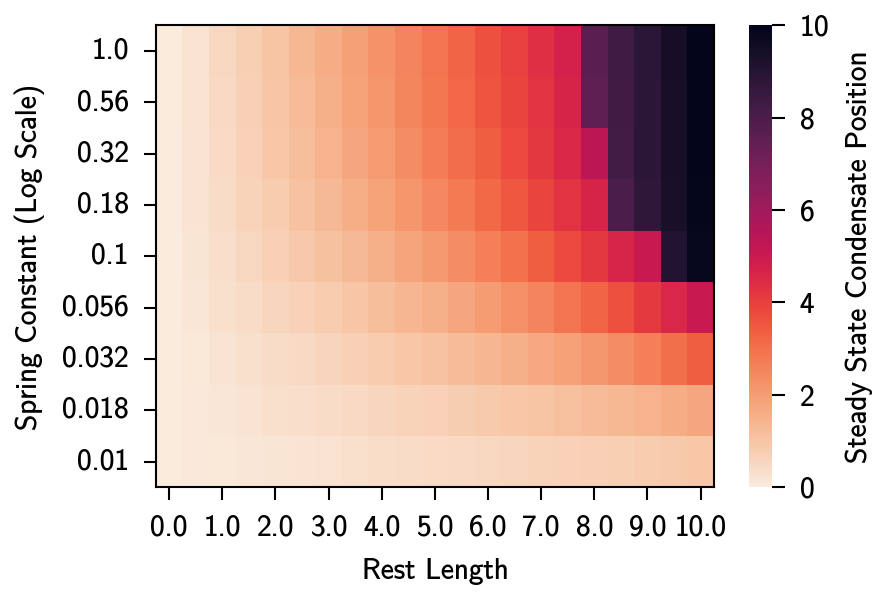

In [12]:
variable="condensate_com"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel="Steady State Condensate Position"

fig, ax = plt.subplots()
pivot = df.pivot(index="k_tilde",columns="rest_length",values=variable)
sns.heatmap(pivot, ax = ax,
            cbar_kws={'label': cbarlabel},
            cmap="rocket_r",
            vmin=0,
            vmax=10)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

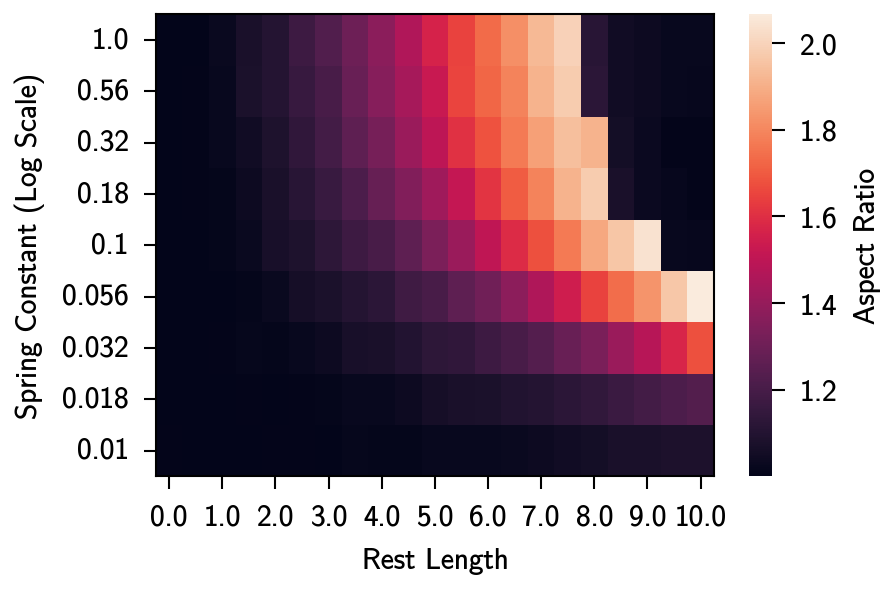

In [17]:
variable="aspect_ratio"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel="Aspect Ratio"

fig, ax = plt.subplots()
pivot = df.pivot(index="k_tilde",columns="rest_length",values=variable)
sns.heatmap(pivot, ax = ax,
            cbar_kws={'label': cbarlabel})
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

In [87]:
df = pd.DataFrame(masks)
df.loc[:, "rest_length"] = df["rest_length"].apply(lambda x: eval(x)[0])

In [90]:
mask_pivot = df.pivot(index="k_tilde",columns="rest_length",values="mask")

In [16]:
def shape(xy,ax):
    x = xy[:,0]
    y = xy[:,1]
    ax.scatter(x,y,s=0.1,marker='.',color="white")
    ax.set_aspect(1)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)

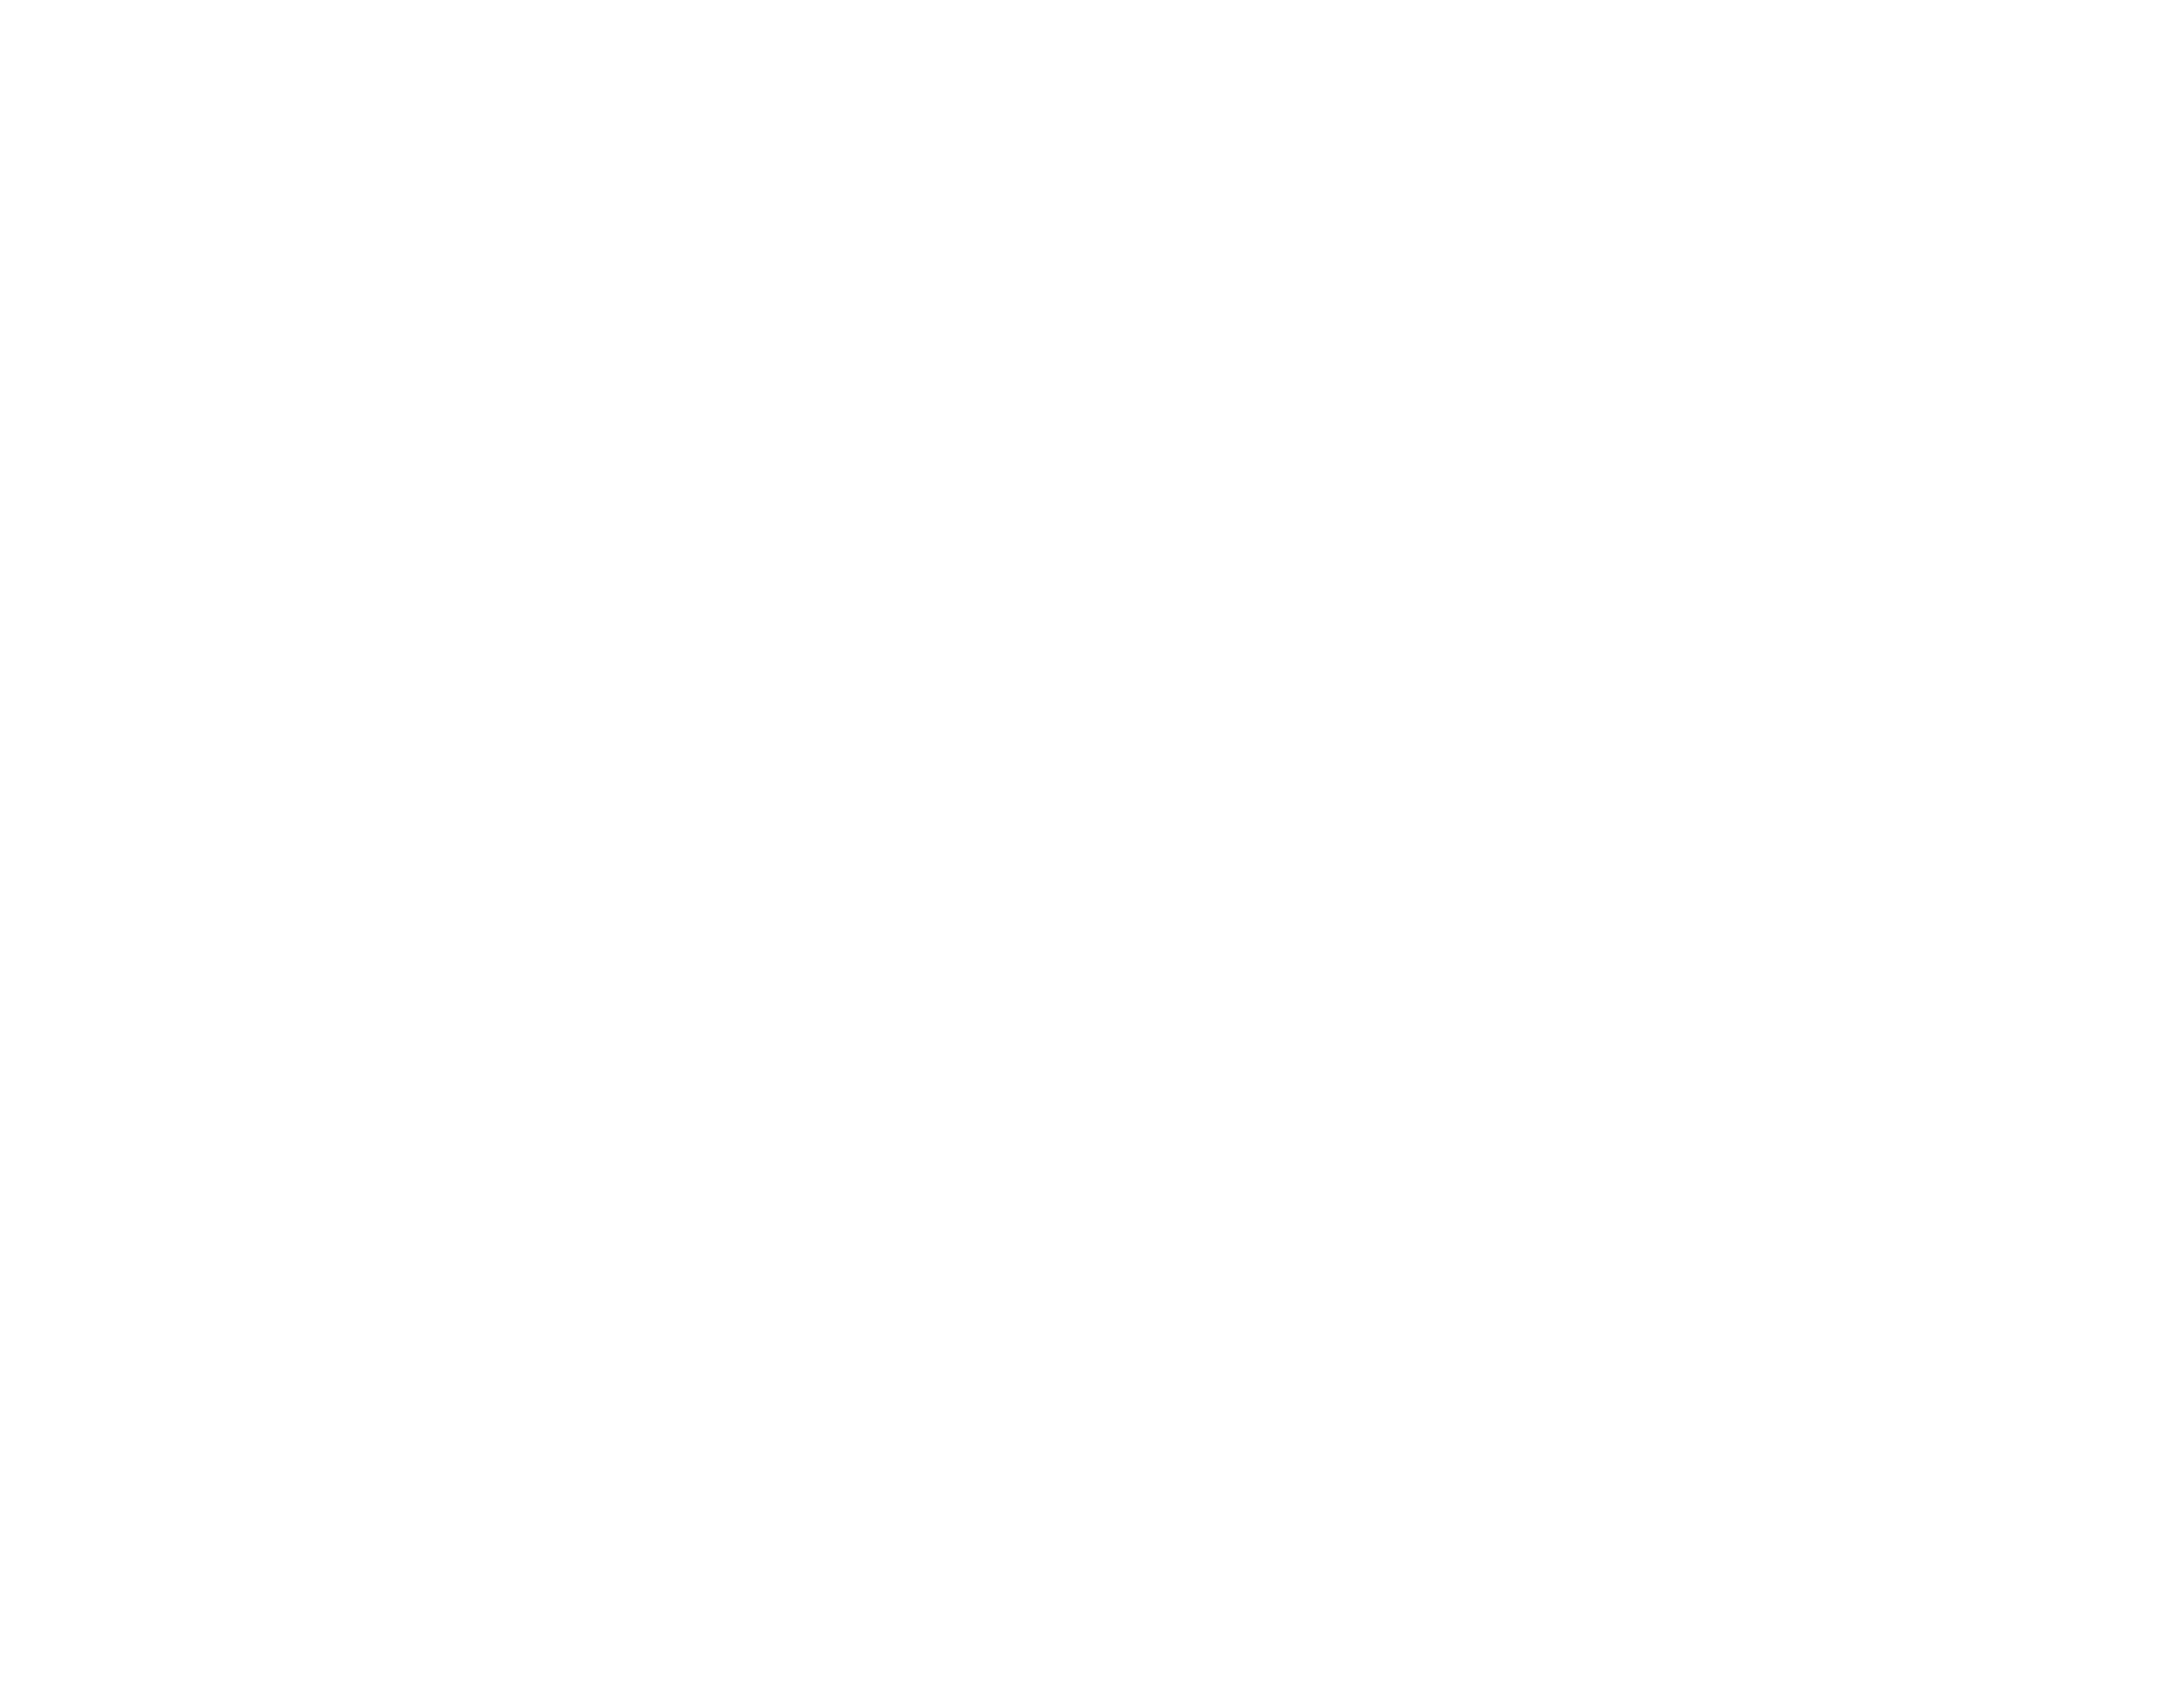

In [112]:
fig,axes=plt.subplots(len(mask_pivot.index),len(mask_pivot.columns))
fig.set_size_inches(18,15)
for ax,arr in zip(axes.flatten(),mask_pivot.loc[::-1].to_numpy().flatten()):
    shape(arr,ax)
plt.savefig("mask.png", transparent=True, dpi=300, bbox_inches='tight')

In [12]:
spd = springPhaseDiagram(root/"20240123_PhaseDiagramFixedAccurateMobilityFocus")
spd.extract_data(119)
spd.df.to_pickle("20240123_PhaseDiagramFixedAccurateMobilityFocus.pkl")

Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.Using default movie parameters.

Using default movie parameters.Using default movie parameters.




Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using de

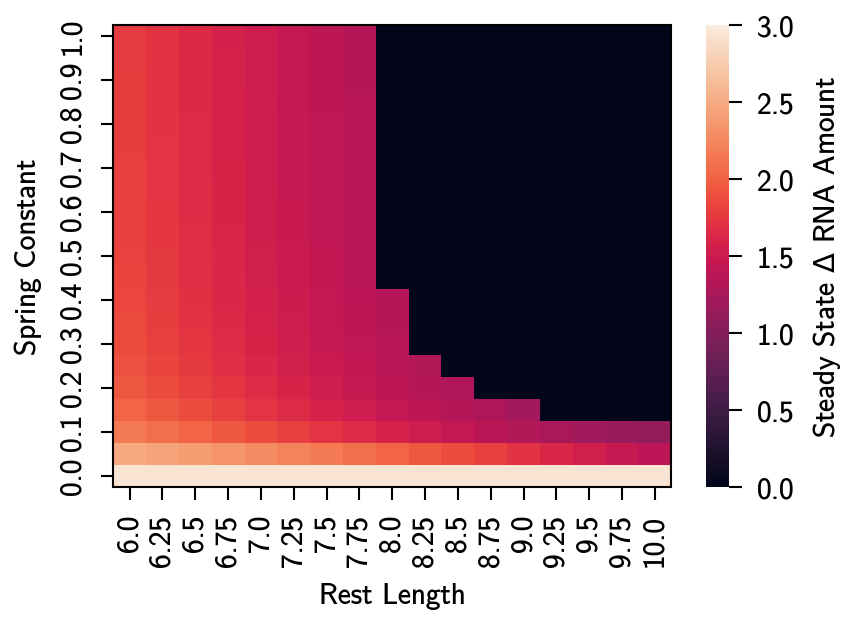

In [21]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = spd.df.pivot(index="k_tilde",columns="rest_length",values=variable)
sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

[Text(0, 0.5, '0'),
 Text(0, 2.5, '0.1'),
 Text(0, 4.5, '0.2'),
 Text(0, 6.500000000000001, '0.3'),
 Text(0, 8.5, '0.4'),
 Text(0, 10.5, '0.5'),
 Text(0, 12.500000000000002, '0.6'),
 Text(0, 14.500000000000002, '0.7'),
 Text(0, 16.5, '0.8'),
 Text(0, 18.5, '0.9'),
 Text(0, 20.5, '1')]

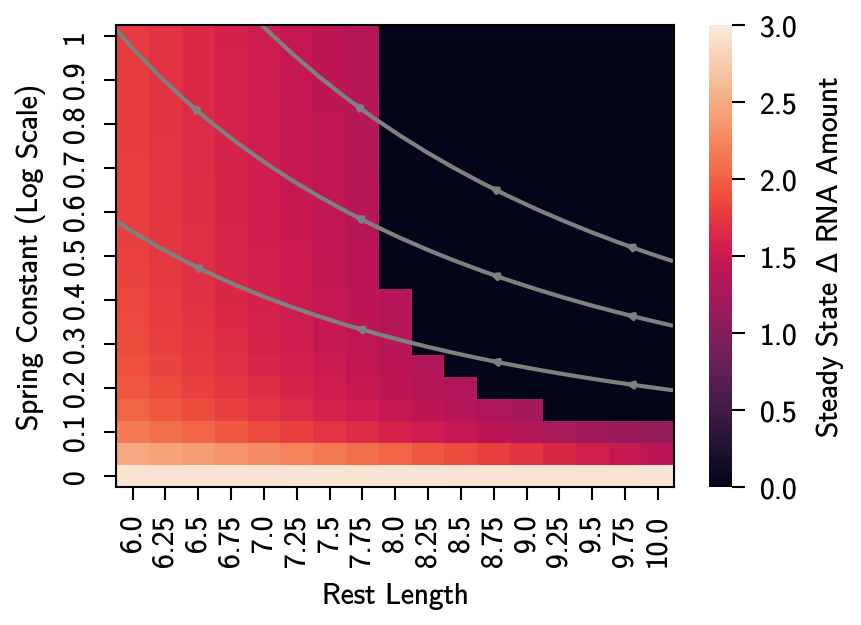

In [34]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
pivot = spd.df.pivot(index="k_tilde",columns="rest_length",values=variable)
g = sns.heatmap(pivot-no_condensate_rna, ax = ax,
            cbar_kws={'label': cbarlabel},
            vmin=0,vmax=3)
ax.invert_yaxis()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
for spine in ax.spines:
    ax.spines[spine].set_visible(True)
    
    
for c in [20, 35, 50]:
    line_x = np.linspace(0,10.1)
    line_y = c/line_x**2

    x_min, x_max = pivot.columns.min(), pivot.columns.max()
    mapped_x = (line_x - x_min) / (x_max - x_min) * (len(pivot.columns) - 1)+0.5

    # Map y coordinates (logarithmic scale)
    y_min, y_max = pivot.index.min(), pivot.index.max()
    mapped_y = (line_y - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

    line, = ax.plot(mapped_x,mapped_y,color="grey")
    plot.add_arrow(line,direction='left')

def map_y(y):
    return (y - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

# ax.yaxis.set_minor_locator(ticker.FixedLocator(map_y(generate_linlog_sequence(0.01,1))))
ax.set_yticks(map_y(np.arange(0,1+0.1,0.1)))
ax.set_yticklabels([f"{i:.2g}" for i in np.arange(0,1+0.1,0.1)])


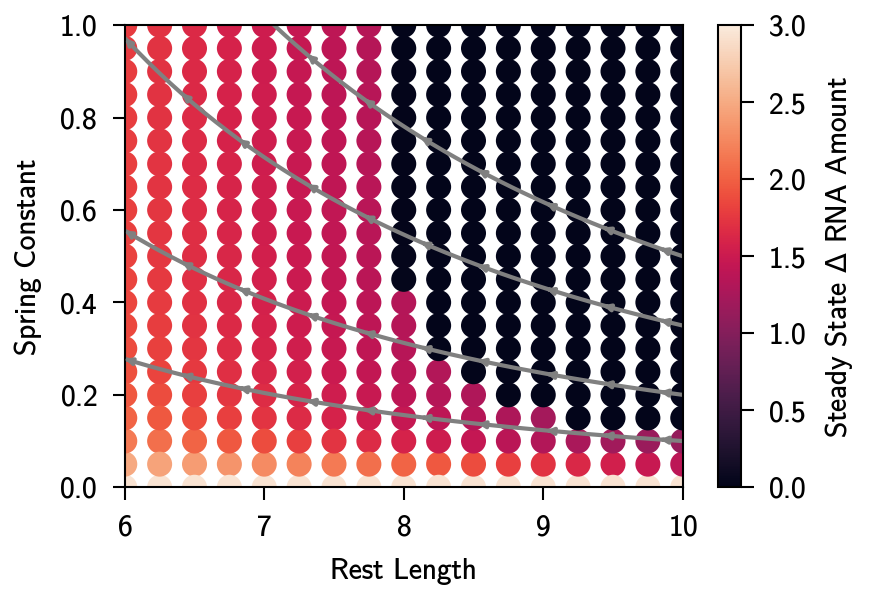

In [15]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant"
cbarlabel='Steady State $\Delta$ RNA Amount'

fig, ax = plt.subplots()
im = ax.scatter(x=df["rest_length"],
            y=df["k_tilde"],
            c=df["rna_amount"]-no_condensate_rna,
            cmap="rocket",
            s=25,
            vmin=0,
            vmax=3)
fig.colorbar(im, ax=ax, label=cbarlabel)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim([6,10])
ax.set_ylim([0,1])
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

for c in [10,20,35,50]:
    x = np.linspace(6,10)
    line, = ax.plot(x,c/x**2,color="grey")
    plot.add_arrow(line,direction='left')